<a href="https://colab.research.google.com/github/Biswajitjitu6/Bike-sharing-demand-prediction/blob/main/Seoul_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT TITLE : SEOUL BIKE SHARING DEMAND PREDICTION**

**Project Type** - Regression

**Contribution** - Individual

**Name** - Biswajit Sahoo

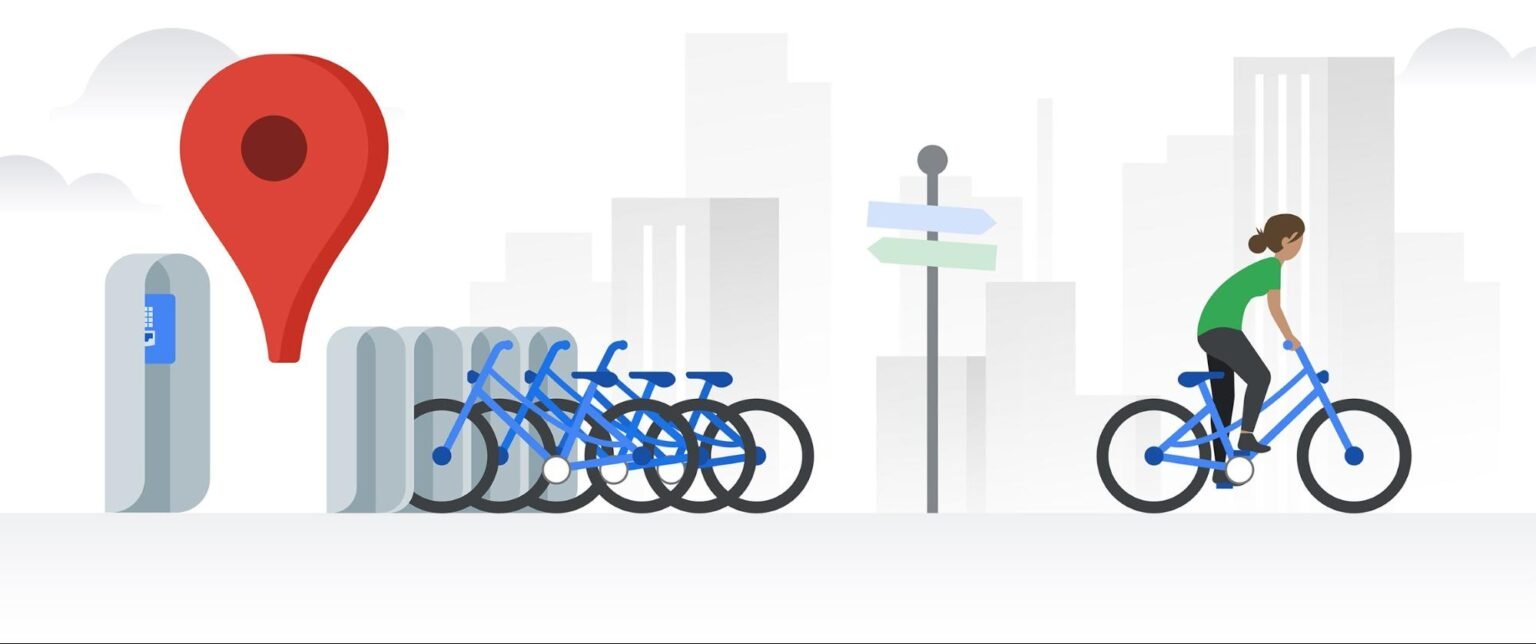

## **Github Link:**

https://github.com/Biswajitjitu6/Bike-sharing-demand-prediction/tree/main

### **Problem Statement**

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


### **Data Description**

####  The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.


#### **Attribute Information:**

- ##### **Date** : year-month-day
- ##### **Rented Bike count** - Count of bikes rented at each hour
- ##### **Hour** - Hour of the day
- ##### **Temperature**-Temperature in Celsius
- ##### **Humidity** - %
- ##### **Windspeed** - m/s
- ##### **Visibility** - 10m
- ##### **Dew point temperature** - Celsius
- ##### **Solar radiation** - MJ/m2
- ##### **Rainfall** - mm
- ##### **Snowfall** - cm
- ##### **Seasons** - Winter, Spring, Summer, Autumn
- ##### **Holiday** - Holiday/No holiday
- ##### **Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

# ***Let's Start !***

## **1. Know Your Data**

### 1.Import Libraries

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import math
import warnings
warnings.filterwarnings('ignore')

### 2.Dataset Loading

In [ ]:
#Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the dataset in Colab
bike_df=pd.read_csv('/content/drive/MyDrive/Almabetter Projects/Regression/SeoulBikeData.csv',encoding = 'unicode_escape')

# Loading the dataset in VS code
#bike_df = pd.read_csv("C:/Users/ASUS/OneDrive/Desktop/Almabetter Projects/Regression/SeoulBikeData.csv", encoding= 'ISO-8859-1' )

# Make a copy of dataset for the catboost algorithm
cat_bike_df=bike_df.copy()

### 3.Dataset First View

In [ ]:
# First look of the dataset
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### 4.Dataset Rows & Columns count

In [ ]:
# Checking the shape of the dataframe
bike_df.shape

(8760, 14)

In [ ]:
# Columns name
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### 5.Dataset Information

In [ ]:
# Information about the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Finding out the various stastistics for all varibles of the dataset
bike_df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


#### 6.Missing Values/Null Values

In [ ]:
# Checking the null values in the dataset
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### 7.Duplicate Values

In [ ]:
# Checking the duplicate data in our dataset
bike_df.duplicated().sum()

0

#### **What did you know about your dataset?**
- There are 8760 records and 14 features.
- There are 4 catagorical columns. Date(Will be changed to datetime data type later), Seasons, Holyiday, Funtioning Day
- Rented Bike count is the target column.
- No null value or missing value is present.
- No duplicated value is present in our data set.

#### 8.Analyzing the Categorical Columns

### **Chart-1:** Seasons count

In [ ]:
# Checking the value counts for the categorical varible Seasons
bike_df['Seasons'].value_counts()


Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

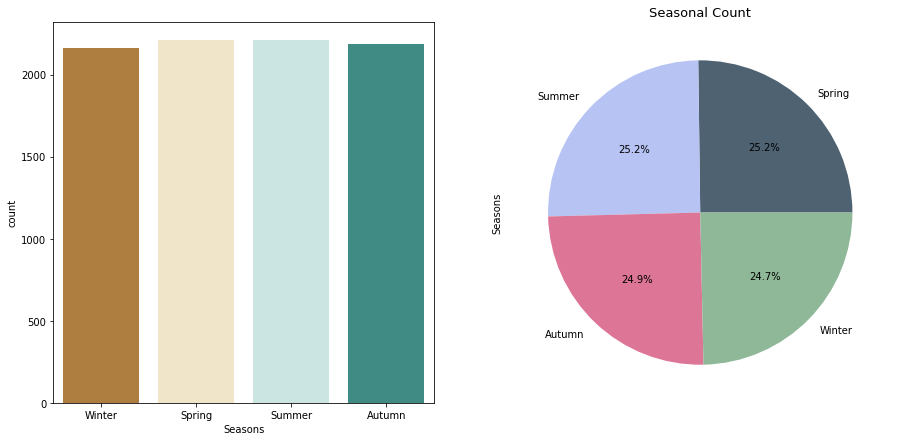

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(bike_df['Seasons'], data=bike_df,ax = axes[0],palette = 'BrBG')
plt.title('Seasonal Count', fontsize=13) #title for the countplot
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
bike_df['Seasons'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[1],colors = colors, figsize=(15,7))
sns.set(style="darkgrid")
plt.show()
fig.tight_layout()
plt.tight_layout()

**1. Why did you pick the specific chart?**
- To analyze the count of seasons in our dataset.

**2. What is/are the insight(s) found from the chart?**
- The seasonal count is almost same.

**3. Will the gained insights help creating a positive business impact?**
- No, it won't As all season contribute the same impacts.

### **Chart-2:** Holiday count

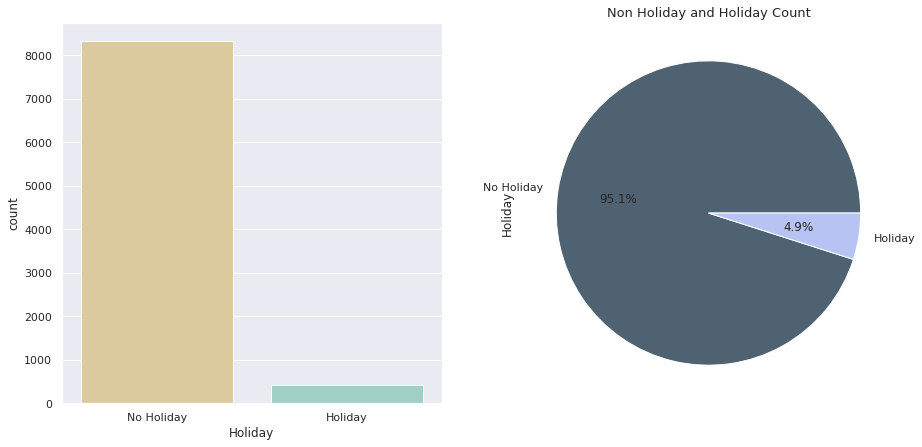

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(bike_df['Holiday'], data=bike_df,ax = axes[0],palette = 'BrBG')
plt.title('Non Holiday and Holiday Count', fontsize=13) #title for the countplot
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
bike_df['Holiday'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[1],colors = colors, figsize=(15,7))
sns.set(style="darkgrid")
plt.show()
fig.tight_layout()
plt.tight_layout()

**1. Why did you pick the specific chart?**
- To analyze the count of Holiday in our dataset.

**2. What is/are the insight(s) found from the chart?**
- The count of Non holiday is More in comparison to holiday. i.e 95:1 percent

**3. Will the gained insights help creating a positive business impact?**
- Yes, it will have a positive business impact because in Non holiday time there should be the more bike availability as compare to holiday time.

### **Chart-3:** Functioning Day Count

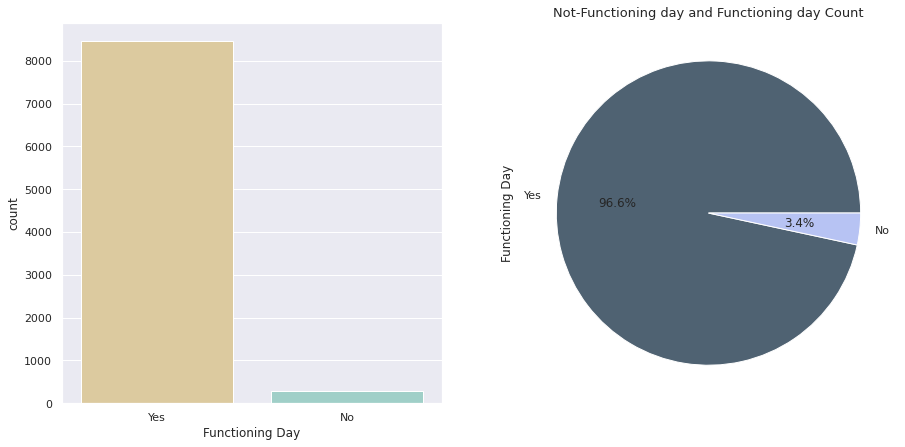

<Figure size 432x288 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(bike_df['Functioning Day'], data=bike_df,ax = axes[0],palette = 'BrBG')
plt.title('Not-Functioning day and Functioning day Count', fontsize=13) #title for the countplot
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897']
bike_df['Functioning Day'].value_counts().plot.pie( autopct = '%.1f%%',ax = axes[1],colors = colors, figsize=(15,7))
sns.set(style="darkgrid")
plt.show()
fig.tight_layout()
plt.tight_layout()

**1. Why did you pick the specific chart?**
- To analyze the count of Functioning Day in our dataset.

**2. What is/are the insight(s) found from the chart?**
- The functional hours is more than the Non functional hours.

**3. Will the gained insights help creating a positive business impact?**
- Yes, it will create a positive impact.

##### Extracting the Date and month from the Date column.

In [ ]:
# We convert as datetime the series 'Date' and adding the month column to dataset
bike_df['Date']=pd.to_datetime(bike_df['Date'])
bike_df['Month']= pd.DatetimeIndex(bike_df['Date']).month

<AxesSubplot:>

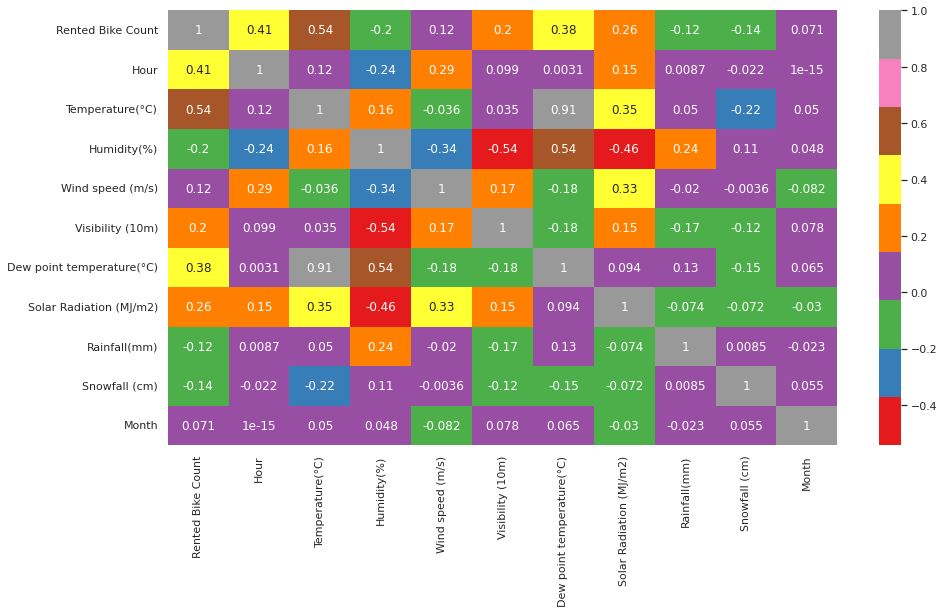

In [ ]:
#Ploting the heatmap for the correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(bike_df.corr(),annot=True, cmap='Set1')

### **What did you observed from the specific chart:**


*   It is clear from the heatmap that the variables like Hour, Temperature, and Dew point temperature have a high impact on the target variable.
*   As we can see that the independent variable Temperature and Dew point temperatures are highly correlated.




## **2.Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**
*   Data visualization is the process of translating large data sets and metrics into
charts, graphs and other visuals. The resulting visual representation of data
makes it easier to identify and share real-time trends, outliers, and new
insights about the information represented in the data.
*  The field of data visualization combines both art and data science. While a
data visualization can be creative and pleasing to look at, it should also be
functional in its visual communication of the data.

### **Chart - 1** - Month wise Count plot of Rented Bike count 

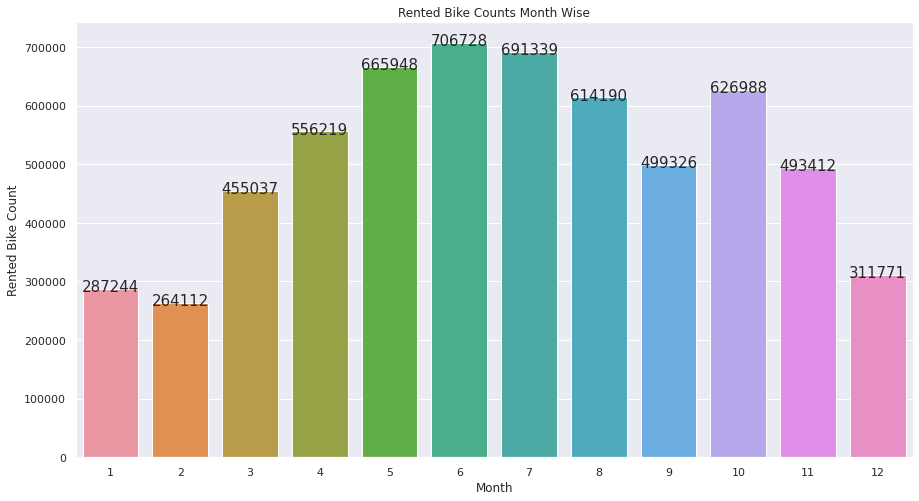

In [ ]:
# Rented Bike count month wise
Rented_bike_per_month = pd.DataFrame(bike_df['Rented Bike Count'].groupby(by=bike_df['Month']).sum()).reset_index().sort_values("Month", ascending=True)

# Ploting the graph with seaborn
plt.figure(figsize= (15,8))
ax = sns.barplot(x='Month', y='Rented Bike Count', data=Rented_bike_per_month)
ax.set_title('Rented Bike Counts Month Wise')
ax.set_xlabel('Month')
ax.set_ylabel('Rented Bike Count')
# Add annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 2),
                   textcoords='offset points')  

**1. Why did you pick the specific chart?**
- Countplot show the frequency, counts of values for the different levels of a categorical or nominal variable.To show the count of interested and not-interested of policyholders , I have used Countplot.

**2. What is/are the insight(s) found from the chart?**
- The number of rented bikes count in the month of June is 706728 which is higher than all other months.
- The number of rented bike counts in February is 264112 which is the least in all months.


**3. Will the gained insights help creating a positive business impact?**
- Yes, It will. Because it is clearly understood that june has the heighest count of rented bike and the availabilty of bikes availability should be more in this period.

#### **Chart - 2** - Analysis graph between the temperature and rented bike counts

Text(0, 0.5, 'Rented bikes')

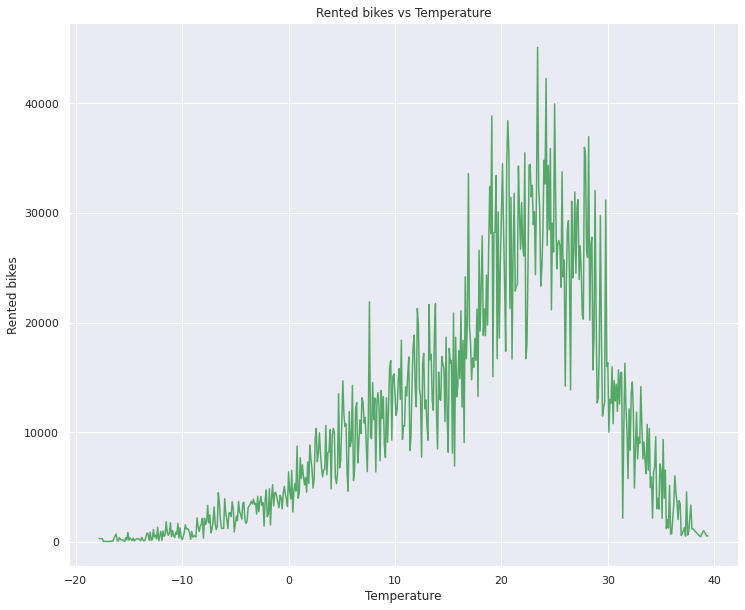

In [ ]:
# Plot the graph between the temperature and rented bike counts
tem_rent=bike_df.groupby('Temperature(°C)')['Rented Bike Count'].sum()
tem_rent.plot(color='g',figsize=(12, 10))
plt.title('Rented bikes vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Rented bikes')

**1. Why did you pick the specific chart?**
- Here, Lineplot is used to visualize the tred of rented bike counts according to the Temperature.

**2. What is/are the insight(s) found from the chart?**
- From the graph, we can see that people prefer to take bike ride more often when the temperature is near about 25 degrees Celcius.
- we can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.  


**3. Will the gained insights help creating a positive business impact?**
- Yes, It will. Because it is more comfort when the temperature is neither too low or too high. 20-30 degree is the most moderate temp as we can see from the graph. so in the extreme condition the bike demand may hamper. so it will create a business impact


#### **Chart - 3** - Analysis between the Season and rented bike counts

In [ ]:
# Rented bike counts seasons wise
season_count=bike_df.groupby('Seasons')['Rented Bike Count'].sum()
season_df=pd.DataFrame(season_count)

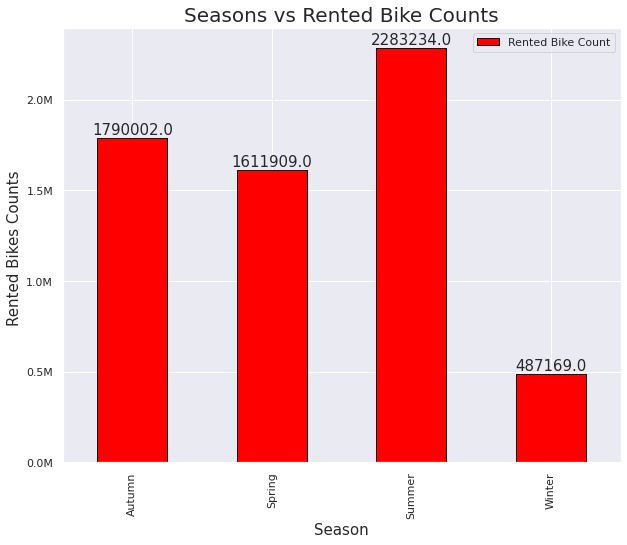

In [ ]:
# Plot the bar plot for season count
from matplotlib.ticker import FuncFormatter
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x*1e-6)
formatter = FuncFormatter(millions)
ax=season_df.plot.bar(figsize=(10, 8),color=['red', 'green', 'blue', 'yellow'],edgecolor='black')

# Set the title
ax.set_title('Seasons vs Rented Bike Counts', fontsize = 20)

# Add annotation
for bar in ax.patches:
  ax.annotate(format(bar.get_height(), '.1f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  

# Set x and y-labels
ax.set_xlabel("Season", fontsize = 15)
ax.set_ylabel("Rented Bikes Counts ", fontsize = 15)
ax.yaxis.set_major_formatter(formatter)



**1. Why did you pick the specific chart?**
- Here, barplot is used to visualize the count of rented bike counts according to the season.
 

**2. What is/are the insight(s) found from the chart?**
- From the chart, we can see that the highest number of bikes are rented in the summer season.
- In the winter season, people prefer fewer bikes as compared to other seasons.

 
**3. Will the gained insights help creating a positive business impact?**
- Yes, It will. Because there may be a greate effect on the rental bike business in winter.

#### **Chart - 4** - Analysis of distribution of numerical features with target values

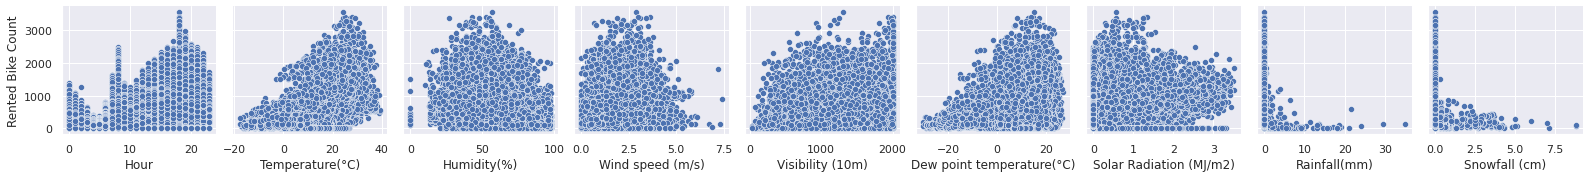

In [ ]:
# Here we plot the Pairpolt for dependent and independent variable
sns.set(rc={'figure.figsize':(15,12)})
g=sns.pairplot(x_vars=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
             ,y_vars='Rented Bike Count',data=bike_df,palette='Dark2')

**1. Why did you pick the specific chart?**
- Here, pairplot is used to visualize the distribution of different numerical features with target features.
 

**2. What is/are the insight(s) found from the chart?**
- The given problem is solved by the regression model but from the above pairplot, we can see that the relationship between the independent variable and the dependent variable 
is not linear. So it shows that a linear regression fitting might not be the best model for it. 
- A linear model might not be able to efficiently explain the data in terms of 
variability, prediction accuracy etc.

 
**3. Will the gained insights help creating a positive business impact?**
- No, It will not. 




#### **Chart - 5** - Demand of Bikes in the working day and in holiday.

In [ ]:
# Bike Rented on Holidays and No-Holidays
holiday_count=bike_df.groupby(['Holiday'])['Rented Bike Count'].sum()
holiday_df=pd.DataFrame(holiday_count)

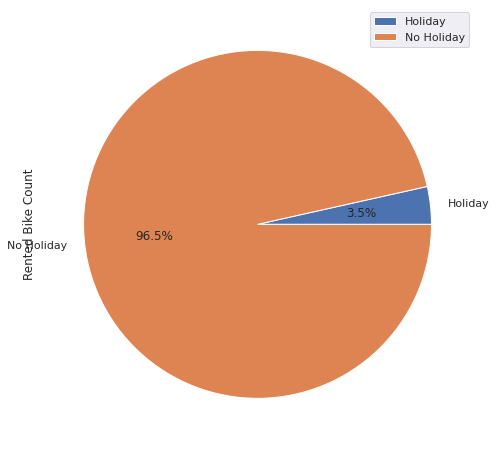

In [ ]:
holiday_df.plot.pie(subplots=True, figsize=(10, 8), autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.show()

**1. Why did you pick the specific chart?**
- A piechart is used to visualize the demand of bike in a holiday and in a non holiday.
 

**2. What is/are the insight(s) found from the chart?**
- Very few bikes are hired on the holidays.
- The majority of the bikes are rented on days other than holidays.

 
**3. Will the gained insights help creating a positive business impact?**
- No it has not any positive business impact.

#### **Chart - 6** - Analysis of bike count based on humidity

Text(0, 0.5, 'Counts')

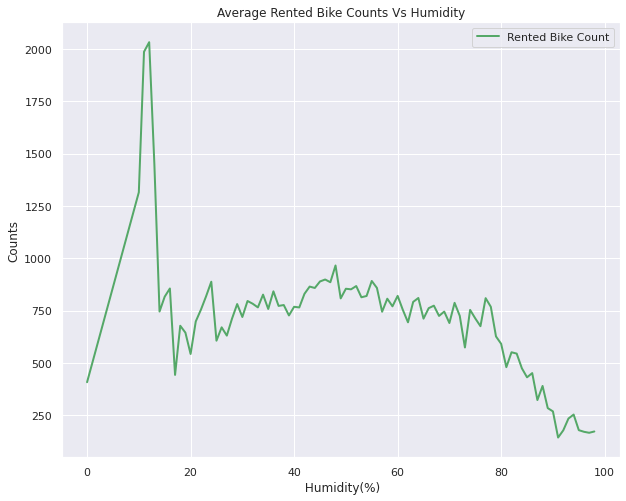

In [ ]:
# Plot the graph between the Humidity and Average Rented Bike counts
humidity_rent=bike_df.groupby('Humidity(%)')['Rented Bike Count'].mean()
humidity_df=pd.DataFrame(humidity_rent)
humidity_df.plot(kind='line', linewidth=2, markersize=12,animated=True, color='g',figsize=(10, 8))
plt.title('Average Rented Bike Counts Vs Humidity')
plt.xlabel(' Humidity(%)')
plt.ylabel('Counts')

**1. Why did you pick the specific chart?**
- A linechart is used to visualize the demand of bike count according to humidity

**2. What is/are the insight(s) found from the chart?**
- When humidity levels are less than 20% the rented bike counts are quite high.
- When humidity levels are greater than 50% the rented bike count decreased rapidly.

 
**3. Will the gained insights help creating a positive business impact?**
- Yes, It will help.

#### **Chart - 7** - Analysis of bike count based on Month in out entire dataset

Text(0, 0.5, 'Counts')

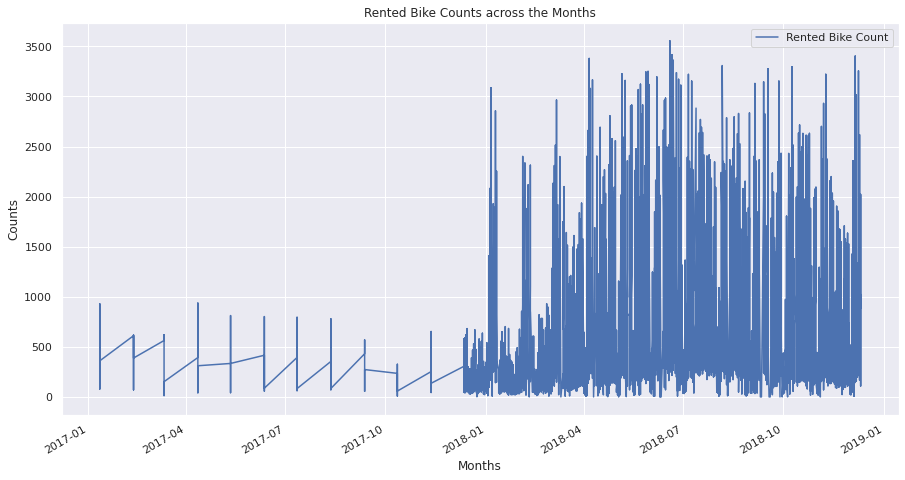

In [ ]:
# Plot the graph between the months and Rented Bike counts

bike_df.plot(x='Date',y='Rented Bike Count',kind='line', figsize=(15,8))
plt.title('Rented Bike Counts across the Months')
plt.xlabel('Months')
plt.ylabel('Counts')

**1. Why did you pick the specific chart?**
- A linechart is used to visualize the Rented Bike Counts across the Months

**2. What is/are the insight(s) found from the chart?**
- From the graph, we can see that the demand for bikes on rent increases between April to autumn.

 
**3. Will the gained insights help creating a positive business impact?**
- it is will not that much of impactable.

#### **Chart - 8** - Bike count VS Rainfall analysis

In [ ]:
# Rented bike count on the basis of Rainfall
rainfall_rent=bike_df.groupby('Rainfall(mm)')['Rented Bike Count'].mean()
rainfall_df=pd.DataFrame(rainfall_rent)


Text(0, 0.5, 'Counts')

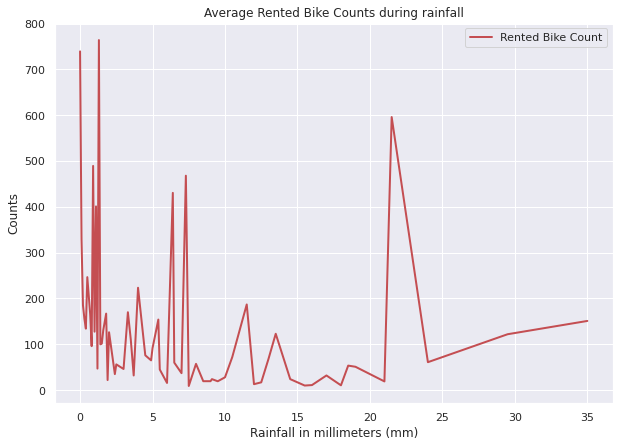

In [ ]:
# Plot the graph between the rainfall and Average Rented Bike counts
rainfall_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='r',figsize=(10, 7))
plt.title('Average Rented Bike Counts during rainfall')
plt.xlabel('Rainfall in millimeters (mm)')
plt.ylabel('Counts')

**1. Why did you pick the specific chart?**
- A linechart is used to visualize the Rented Bike Counts according to the Rainfall

**2. What is/are the insight(s) found from the chart?**
- From the graph, we can see that when rainfall is less than 8mm people take more bikes on rent. But, we can also see the peak in between 20mm to 25mm that is not easy to digest. 
- For this interval, we check the data frame and try to find a more precise reason. 

 
**3. Will the gained insights help creating a positive business impact?**
- Yes, because in the extreme case the demand will decrease.

#### **Chart - 9** - Bike count VS Visibility

In [ ]:
# Rented bike count on the basis of Visibility
visibility_rent=bike_df.groupby('Visibility (10m)')['Rented Bike Count'].mean()
visibility_df=pd.DataFrame(visibility_rent)


Text(0, 0.5, 'Counts')

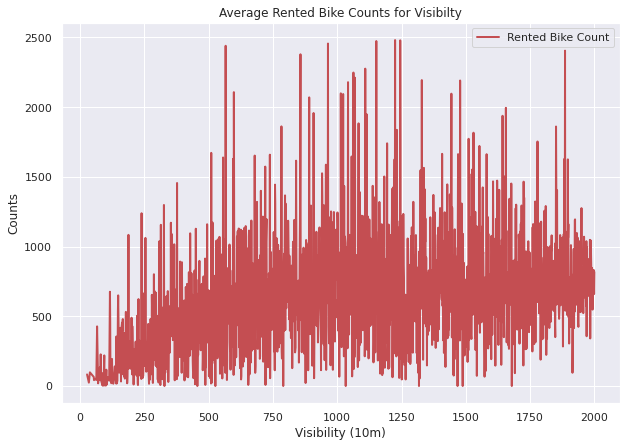

In [ ]:
# Plot the for visibility  and Average Rented Bike counts
visibility_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='r',figsize=(10,7))
plt.title('Average Rented Bike Counts for Visibilty')
plt.xlabel('Visibility (10m)')
plt.ylabel('Counts')

**1. Why did you pick the specific chart?**
- A linechart is used to visualize the Rented Bike Counts according to the visibilty.

**2. What is/are the insight(s) found from the chart?**
- It is clearly visible from the graph, the rented bike count increase with an increase in invisibility.

 
**3. Will the gained insights help creating a positive business impact?**
- Obviously i will help. because when there is no visibility the demand of bike is low.


#### **Chart - 10** - Bike count VS Snowfall

Text(0, 0.5, 'Counts')

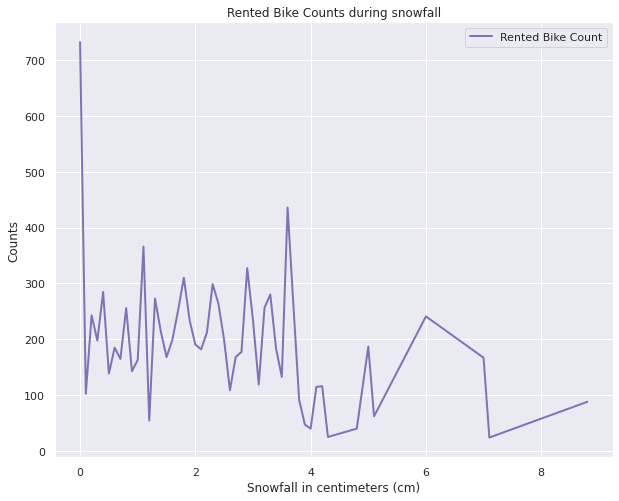

In [ ]:
# Plot the graph between the snowfall and Rented Bike counts
snowfall_rent=bike_df.groupby('Snowfall (cm)')['Rented Bike Count'].mean()
snowfall_df=pd.DataFrame(snowfall_rent)
snowfall_df.plot(kind='line',linewidth=2, markersize=12,animated=True, color='m',figsize=(10, 8))
plt.title('Rented Bike Counts during snowfall')
plt.xlabel('Snowfall in centimeters (cm)')
plt.ylabel('Counts')

**1. Why did you pick the specific chart?**
- A linechart is used to visualize the Rented Bike Counts according to the Snow fall.

**2. What is/are the insight(s) found from the chart?**
- Mostly bikes were taken on rent when snowfall is less than 4cm.
- It is very difficult the drive bikes in snow so the usage of bikes decreases in the high snowfall.

 
**3. Will the gained insights help creating a positive business impact?**
- Yes, it will.

#### **Chart - 10** - Bike count VS Hours per day

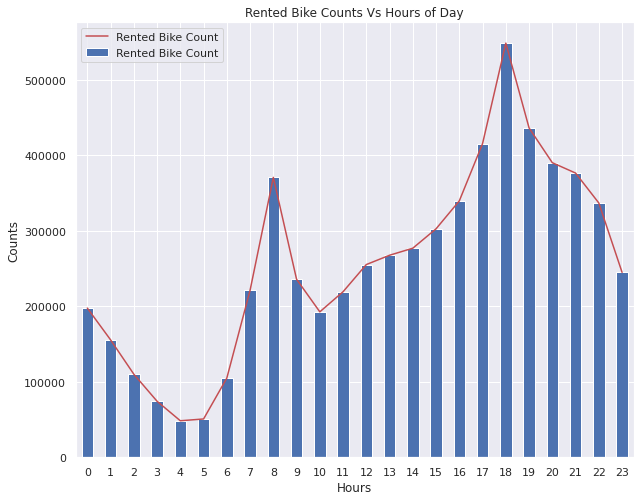

In [ ]:
# Plot the graph between the Rented Bike Counts and Hours of Day
bike_df.groupby('Hour').sum()['Rented Bike Count'].plot.bar(color='b',figsize=(10, 8))
bike_df.groupby('Hour').sum()['Rented Bike Count'].plot(color='r',figsize=(10, 8))
plt.title('Rented Bike Counts Vs Hours of Day')
plt.xlabel('Hours')
plt.ylabel('Counts')
plt.legend()


**1. Why did you pick the specific chart?**
- A barchart is used to visualize the Rented Bike Counts demadn in the hours of the whole day

**2. What is/are the insight(s) found from the chart?**
- The usage of rented bikes is high in between 4 pm to 10 pm. It means people take bikes on rent while returning to their homes from their workplaces to avoid heavy traffic.
- At 8 am in the morning the usage of rented bikes is higher than normal. It means people take bikes on rent to go to their workplace or dropping their children at school.
 
**3. Will the gained insights help creating a positive business impact?**
- Yes, it will.

## **3.FEATURE ENGINEERING AND DATA PREPROCESSING**

In [ ]:
## Creating numerical columns
numerical_cols = list(bike_df.describe())
numerical_df = bike_df[numerical_cols]
numerical_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


## 1. Finding the outliers and Treatment

### **Chart -1**: Distribution plot

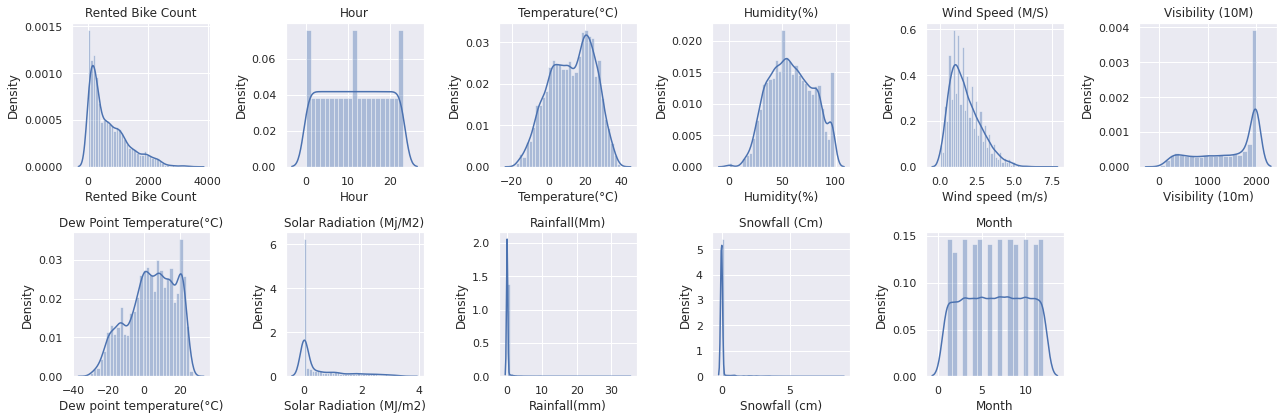

In [ ]:
# Visualizing the distributions
plt.figure(figsize=(18,6))
for n,column in enumerate(bike_df.describe().columns):
  plt.subplot(2,6,n+1)
  sns.distplot(bike_df[column])
  plt.title(f'{column.title()}')
  plt.tight_layout()

**1. Why did you pick the specific chart?**
- Distribution plots visually assess the distribution of sample data by comparing the empirical distribution of the data with the theoretical values expected from a specified distribution.

**2. What is/are the insight(s) found from the chart?**
- It has been observed that Hour, temp, humidity and dew point temp are quite normally distributed than the other columns.
- The rented bike count, the solar radiation, rainfall, snowfall are right skewed data columns and visibility column is left skewed.

### **Chart -2:** Boxplot

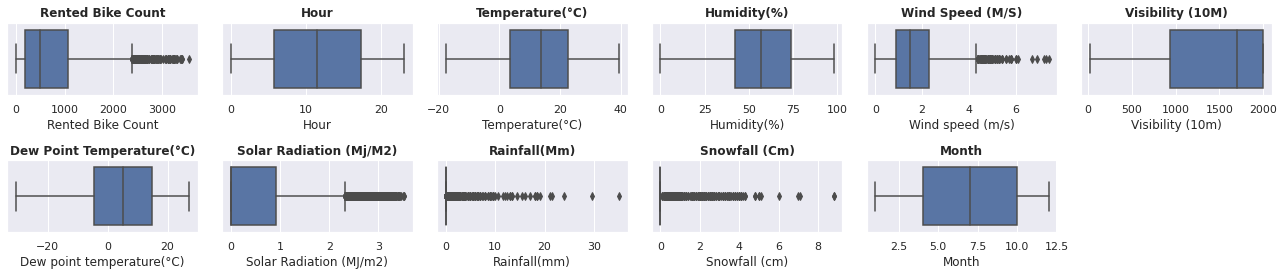

In [ ]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(bike_df.describe().columns):
  plt.subplot(2, 6, n+1)
  sns.boxplot(bike_df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

**1. Why did you pick the specific chart?**
- In the boxplot below, the length of the box is IQR, and the minimum and maximum values are represented by the whiskers. The whiskers are generally extended into 1.5*IQR distance on either side of the box. Therefore, all data points outside these 1.5*IQR values are flagged as outliers.

**2. What is/are the insight(s) found from the chart?**
- From the above boxplots firstly we conclude that our dependent varible is not evenly distributed and so we will proceed further after using proper function to noramlly distribute our dependent variable. 
- Secondly, we see some of the varibles having outliers and in order to enhance the regression model functionality, we try to reduce the effect of these outliers. As in our real life, we use bikes during moderate showers for rainy and during moderate sunshine and snowfall, we try to filter out the outliers using the following steps.

### 2.. Outliers Treatment

In [ ]:
bike_df.loc[bike_df['Rainfall(mm)']>=4,'Rainfall(mm)']= 4
bike_df.loc[bike_df['Solar Radiation (MJ/m2)']>=2.5,'Solar Radiation (MJ/m2)']=2.5 
bike_df.loc[bike_df['Snowfall (cm)']>2,'Snowfall (cm)']= 2
bike_df.loc[bike_df['Wind speed (m/s)']>=4,'Wind speed (m/s)']= 4

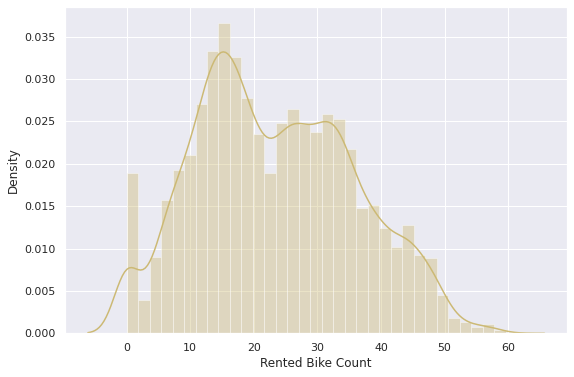

In [ ]:
# from above two graphs we can see that there are so many outliers are present so we have to apply transformation
plt.figure(figsize=(9, 6))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']), color='y')
plt.show()

#### **What you have done And what insights you got from here ?**
1. **Solar radiation-** Outliers are Minimized. The Value which is greatr than 2.5 is considered as Outliers.
2. **Rainfall** - Outliers are Minimized. The Value which is greatr than 4 is considered as Outliers.
2. **Snowfall** - Outliers are Minimized. The Value which is greatr than 2 is considered as Outliers.
4. **Windspeed** - Outliers are Minimized. The Value which is greatr than 4 is considered as Outliers.
5. **rented bike count** - Funtion transform is applied. And after the trasform the distribution is formed nearly normal distribution.

### 3. Correlation By heatmap

<AxesSubplot:>

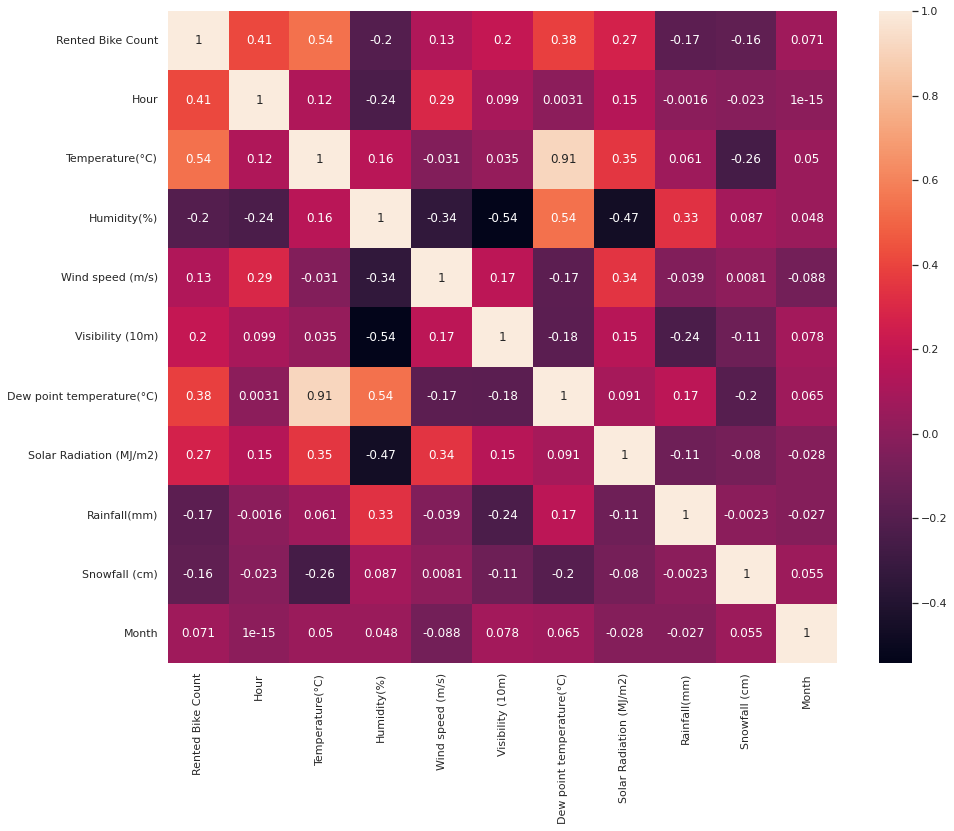

In [ ]:
sns.heatmap(bike_df.corr(),annot=True)

#### **What you have done and what you got from this ?**
- A highly correlation between following variables.
  - dew point temp and temp has correlation of 91%.. (Any one feature shopuld be dropped beacause of high correlation and we will do it in the feature selction section)
  - dew point temp with humidity 54%.
  - Rented bike count with temp is 54%.

## 4. Feature selection

In [ ]:
### Checking for feature selection

##importing the library
from statsmodels.stats.outliers_influence import variance_inflation_factor 

#defining funtion for VIF score
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(bike_df[[i for i in bike_df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.436523
1,Temperature(°C),34.319655
2,Humidity(%),7.115187
3,Wind speed (m/s),5.189290
4,Visibility (10m),9.368880
5,Dew point temperature(°C),17.680103
6,Solar Radiation (MJ/m2),2.954897
7,Rainfall(mm),1.174029
8,Snowfall (cm),1.160887
9,Month,4.701531


#### **1. What you have done ?**
- I have plotted a table showing that the VIF score. It is done to check if there is any mulicolinearity between the features or not.

#### **2. Why you did it ?**
- Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

#### **3. What you got from this ?**
- As we previously saw that their is a correlation between temperature and dew point temperature, so that could be the main reason for the high VIF score. we can see that the VIF score is more than 10 in these two columns. I took 10 as the threshold value for VIF. It does not mean it is always 10. It may varry. Some Data Scientist take 5 and some take 2.5. but according to a research paper i took 10 as my threshhold value.

### 5. Catagorical Encoding

In [ ]:
# Transforming the Holiday variable 
bike_df['Holiday']=bike_df['Holiday'].apply(lambda x: 1 if x=='Holiday' else 0)

# Transforming the Functioning Day variable 
bike_df['Functioning Day']=bike_df['Functioning Day'].apply(lambda x: 1 if x=='Yes' else 0)

### 5. One Hot Encoding

In [ ]:
# Transforming the Seasons variable
from sklearn.preprocessing import OneHotEncoder
one_hot_encoded_data = pd.get_dummies(bike_df['Seasons'])
bike_df=pd.concat([bike_df,one_hot_encoded_data],axis=1)

#### **What you have done and what you got from this ?**

- Binary catagorical encoding is done with functioning day and holiday column. So there will be 1 and 0 only as the unique values.
- One hot encoding is done with season column. so that 4 new extra features are created and finally the origional season column has been dropped. because now no need of that column after encoding.


## **Feature Selection**

In [ ]:
# Removing the column for the dataframe
bike_df.drop('Seasons',axis=1,inplace=True) # As this column is On hot encoded, no need to keep the origional column.

### 1. Form dependent and independent Feature.

In [ ]:
# Data for independent and dependent set
X=bike_df.drop(['Date','Rented Bike Count','Dew point temperature(°C)'],axis=1)
y=bike_df.loc[:,'Rented Bike Count']

Note: Date and Dew point temperature has been dropped from our dataset fro modelling. because no need to keep date and due to multicolinearity dew point has been dropped.

In [ ]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,0.0,0.0,0,1,11,1,0,0,0
8756,20,3.4,37,2.3,2000,0.0,0.0,0.0,0,1,11,1,0,0,0
8757,21,2.6,39,0.3,1968,0.0,0.0,0.0,0,1,11,1,0,0,0
8758,22,2.1,41,1.0,1859,0.0,0.0,0.0,0,1,11,1,0,0,0


In [ ]:
# Shape of independent and dependent dataset
print(X.shape)
print(y.shape)

(8760, 15)
(8760,)


In [ ]:
# Spiliting the data using the Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Checking the size of training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 15)
(7008,)
(1752, 15)
(1752,)


#### **What you have done and what insights you have got?**

- Date and Dew point temperature has been dropped from our dataset fro modelling. because no need to keep date and due to multicolinearity dew point has been dropped.

- Then I have splitted the data set into 80:20 ratio for train test analysis.

- After droping we made X_train that contains 7008 rows and 15 features, y_train that contains 7008 rows and 1 feature that is the target features, X_test contains 1752 rows and 15 columns and the y_test contains 1752 rows and 1 feature.

## **Scaling**

In [ ]:
# Now we rescaling our data
scalar=MinMaxScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
X_train

array([[0.65217391, 0.54195804, 0.62244898, ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.71153846, 0.87755102, ..., 0.        , 1.        ,
        0.        ],
       [0.82608696, 0.50699301, 0.46938776, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.60869565, 0.82692308, 0.63265306, ..., 0.        , 1.        ,
        0.        ],
       [0.86956522, 0.25174825, 0.52040816, ..., 0.        , 0.        ,
        1.        ],
       [0.95652174, 0.6486014 , 0.56122449, ..., 0.        , 0.        ,
        0.        ]])

#### **Why do did scaling and what you got?**
- Normalization is the process of scaling all features to the same definite range that is 0 to 1. It is important to normalize the features because the numerical values of different features may vary greatly. If the ranges of the values of different features are significantly different, then some features may dominate the training process, leading to poor model performance. Normalization helps to ensure that all features are given equal weight and have an equal influence on the model.

# **Model Building**

### **Model-1: Linear Regression** 

In [ ]:
# Fitting the Linear Regression on training dataset
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Traning Data Store
regressor.score(X_train,y_train)

0.5632413510709976

In [ ]:
# Predicting the train set results
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
# Calculating the root mean squares error of y_test and y_predicted
rmse=math.sqrt(mean_squared_error(y_test, y_pred))
print('The Root Mean Squared Error:',rmse)

The Root Mean Squared Error: 434.93443533737064


In [ ]:
# Calculating the  mean squares error of y_test and y_predicted
mse=(mean_squared_error(y_test, y_pred))
print('The Mean Squared Error:',mse)

The Mean Squared Error: 189167.96304223745


In [ ]:
# Calulating thr R-Squared and Adjusted R-squared
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.5459746280617703
Adjusted R2 :  0.5420515977742857


### **Observation**

* We tried adding possible columns to make the model a bit more complex but for Linear Regression model it is still too general.

* We have to make our model more complex for better discretion or move to tree and ensembling algorithm for better results.



# **Fitting Lasso Regression**

In [ ]:
# Fitting the Lasso Regression
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
# The lasso training score
lasso.score(X_train, y_train)

0.5632423792707807

In [ ]:
# Performing the hyperparameter tuning
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='r2')

In [ ]:
# Printing the best params and best score
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " The r2_score is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.1}

Using  {'alpha': 0.1}  The r2_score is:  0.5607743302560907


In [ ]:
# Lasso optimal model
optimal_model=lasso_regressor.best_estimator_

# Traning score

print('The training score:',optimal_model.score(X_train,y_train))

The training score: 0.5632306516187067


In [ ]:
# Predicting the valus using lasso
y_pred_lasso = optimal_model.predict(X_test)

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_lasso)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 189154.4381852058
RMSE : 434.9188869033004
R2 : 0.5460070893102051
Adjusted R2 :  0.5420843395058579


# **Fitting Ridge Regression**

In [ ]:
# Fitting Ridge regression and GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='r2')

In [ ]:
# Printing the best params and best score
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_,  "The r2_score is:", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1} The r2_score is: 0.560760123572123


In [ ]:
# Optimal model for Ridge Regression
optimal_model=ridge_regressor.best_estimator_

In [ ]:
# Predecting the output for test data
y_pred_ridge = optimal_model.predict(X_test)

In [ ]:
# Traning score
optimal_model.score(X_train,y_train)

0.5632244987403249

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 189155.18366485005
RMSE : 434.9197439354186
R2 : 0.5460053000713334
Adjusted R2 :  0.5420825348069729


# **Fitting Decision Tree**

In [ ]:
# For decision tree we use the standard scalar
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [ ]:
# Fitting the Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='friedman_mse', max_leaf_nodes=9, max_depth=5)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_leaf_nodes=9)

In [ ]:
#checking the traning
regressor.score(X_train,y_train)

0.6536762573287773

In [ ]:
# Predecting the result on the test data
y_pred=regressor.predict(X_test)

In [ ]:
# Calcuting the R_squared for test data
r2_score(y_test,y_pred)

0.6236660214977983

In [ ]:
# Applying Grid Search for Decision Tree
param = {'max_depth' : [1,4,5,6,7,10,15,20,8], 'max_leaf_nodes':[5,10,20,25,30,40,45]}

decision_tree=DecisionTreeRegressor()

gridSearch_decisionTree=GridSearchCV(decision_tree,param,scoring='r2',cv=5)
gridSearch_decisionTree.fit(X_train,y_train)




GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 4, 5, 6, 7, 10, 15, 20, 8],
                         'max_leaf_nodes': [5, 10, 20, 25, 30, 40, 45]},
             scoring='r2')

In [ ]:
# Best params for decision tree
gridSearch_decisionTree.best_params_

{'max_depth': 15, 'max_leaf_nodes': 45}

In [ ]:
# Score and optimal paramters
print('The best hyperparameter for Decision Tree :',gridSearch_decisionTree.best_params_)
print('The best score:',gridSearch_decisionTree.best_score_)

The best hyperparameter for Decision Tree : {'max_depth': 15, 'max_leaf_nodes': 45}
The best score: 0.7909457184402047


In [ ]:
# Optimal Model for decision tree
optimal_DecisionTree=gridSearch_decisionTree.best_estimator_


In [ ]:
# Predicting the Output value
y_pred_dt=optimal_DecisionTree.predict(X_test)

In [ ]:
# Traning score
optimal_DecisionTree.score(X_train,y_train)

0.8192488068498688

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_dt)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 91767.59225878913
RMSE : 302.93166268779026
R2 : 0.7797469796835017
Adjusted R2 :  0.7778438717890619


#   **Fitting Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Providing the range of values for the hyperparameter, so it can be used for gridsearch
n_estimators=[75,100,125]

# Max Depth of the tree
max_depth=[4,6,8]

# Minimum number of samples requires for the spilting of a node
min_samples_split=[50, 70, 90, 110]

# Minimum number of samples in the leaf node
min_samples_leaf=[40,50]   # To avoid the overfitting of data

# Hyperparameter Grip
grid_dict={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}

In [ ]:
# crearing an instance of the random forest
rf_model=RandomForestRegressor()

# Perform the gridsearch
rf_grid=GridSearchCV(estimator=rf_model, param_grid=grid_dict, scoring='r2',verbose=0, cv=5)

rf_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 70, 90, 110],
                         'n_estimators': [75, 100, 125]},
             scoring='r2')

In [ ]:
# Find the best parameters for the RandomForestRegressor
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 70,
 'n_estimators': 75}

In [ ]:
# Traning Score 
print('The best score:',rf_grid.best_score_)

The best score: 0.7594781529608406


In [ ]:
# Optimal Model
rf_optimal_model=rf_grid.best_estimator_

In [ ]:
# Making predictions on the test data
y_pred_rf=rf_optimal_model.predict(X_test)

In [ ]:
# Training Score
rf_optimal_model.score(X_train,y_train)

0.8285072489850653

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_rf)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 85906.0825892839
RMSE : 293.0973943747776
R2 : 0.7938152926526614
Adjusted R2 :  0.7920337427619873


## **Fitting GradientBoosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
# Providing the range of values for the hyperparameter, so it can be used for gridsearch

# Number of trees
n_estimators=[75,100,125]

# Max Depth of the tree
max_depth=[6,8,10]

# Minimum number of samples requires for the spilting of a node
min_samples_split=[50, 70, 90]

# Minimum number of samples in the leaf node
min_samples_leaf=[40,50,60]   # To avoid the overfitting of data

# Learning rate
learning_rate=[0.15,0.1,0.05]

# Hyperparameter Grip
grid_dict={'n_estimators':n_estimators,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
           'learning_rate':[0.15,0.1,0.05]}

In [ ]:
# crearing an instance of the Gradient Boosting
gb_model=GradientBoostingRegressor()

# Perform the gridsearch
gb_grid=GridSearchCV(estimator=gb_model, param_grid=grid_dict, scoring='r2',verbose=0, cv=5)

gb_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.15, 0.1, 0.05],
                         'max_depth': [6, 8, 10],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [50, 70, 90],
                         'n_estimators': [75, 100, 125]},
             scoring='r2')

In [ ]:
# Find the best parameters for the GradientBoosting
gb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 70,
 'n_estimators': 125}

In [ ]:
# GradientBoosting Score
gb_grid.best_score_

0.8839238216157519

In [ ]:
#optimal model
optimal_gb_model=gb_grid.best_estimator_

In [ ]:
# Training Score
optimal_gb_model.score(X_train,y_train)

0.9414986534558208

In [ ]:
# Making predictions on the test data
y_pred_gb=optimal_gb_model.predict(X_test)

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred_gb)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred_gb)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 51866.508382668915
RMSE : 227.74219719382026
R2 : 0.8755142764088409
Adjusted R2 :  0.8744386509169819


## **Feature Importance**

In [ ]:
importances = optimal_gb_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

df = pd.DataFrame(importance_dict)
importance_df=df.sort_values(by='Feature Importance')

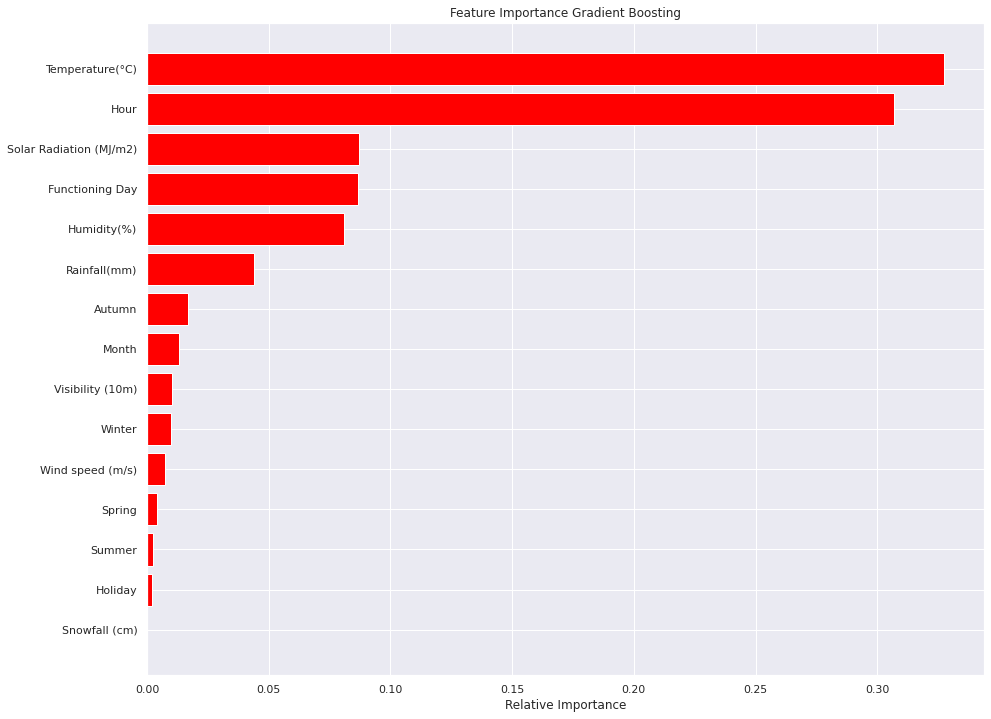

In [ ]:
# Ploting the Feature Importance
plt.barh( importance_df['Feature'],importance_df['Feature Importance'], color='red', align='center')
plt.title('Feature Importance Gradient Boosting')
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = (15,12)
plt.show()

# **Fitting CatBoost**

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.4 MB/s eta 0:00:00


In [ ]:
cat_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Data for dependent and independent
X=cat_bike_df.drop(['Rented Bike Count','Date'],axis=1)
y=cat_bike_df['Rented Bike Count']

In [ ]:
X

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Spiliting the data using the Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Checking the size of training and testing data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7008, 12)
(7008,)
(1752, 12)
(1752,)


In [ ]:
#List of categorical columns
categoricalcolumns = X.select_dtypes(include=["object"]).columns.tolist()
print("Names of categorical columns : ", categoricalcolumns)
#Get location of categorical columns
cat_features = [X.columns.get_loc(col) for col in categoricalcolumns]
print("Location of categorical columns : ",cat_features)

Names of categorical columns :  ['Seasons', 'Holiday', 'Functioning Day']
Location of categorical columns :  [9, 10, 11]


In [ ]:
# importing Pool
from catboost import Pool
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_features
                 )
#Creating pool object for test dataset
test_data = Pool(data=X_test,
                  label=y_test,
                  cat_features=cat_features
                 )

In [ ]:
from catboost import CatBoostRegressor


In [ ]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE', eval_metric='R2')

In [ ]:
grid = {
    'learning_rate': [0.03, 0.1],
    'depth':[4, 6, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}
grid_search_results = cat_model.grid_search(grid, train_data, shuffle=False, verbose=0, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Streaming output truncated to the last 5000 lines.
23:	learn: 0.2161262	test: 0.2336888	best: 0.2336888 (23)	total: 353ms	remaining: 14.3s
24:	learn: 0.2457973	test: 0.2626452	best: 0.2626452 (24)	total: 368ms	remaining: 14.4s
25:	learn: 0.2730005	test: 0.2896565	best: 0.2896565 (25)	total: 384ms	remaining: 14.4s
26:	learn: 0.3010743	test: 0.3166772	best: 0.3166772 (26)	total: 399ms	remaining: 14.4s
27:	learn: 0.3272753	test: 0.3425386	best: 0.3425386 (27)	total: 409ms	remaining: 14.2s
28:	learn: 0.3520412	test: 0.3667585	best: 0.3667585 (28)	total: 424ms	remaining: 14.2s
29:	learn: 0.3720772	test: 0.3860583	best: 0.3860583 (29)	total: 427ms	remaining: 13.8s
30:	learn: 0.3950013	test: 0.4084704	best: 0.4084704 (30)	total: 443ms	remaining: 13.9s
31:	learn: 0.4166755	test: 0.4292386	best: 0.4292386 (31)	total: 458ms	remaining: 13.9s
32:	learn: 0.4366389	test: 0.4487324	best: 0.4487324 (32)	total: 473ms	remaining: 13.9s
33:	learn: 0.4547831	test: 0.4658211	best: 0.4658211 (33)	total: 504m

In [ ]:
grid_search_results['params']

{'depth': 10, 'l2_leaf_reg': 5, 'learning_rate': 0.1}

In [ ]:
#build model
cat_model = CatBoostRegressor(loss_function='RMSE', eval_metric='R2', depth=10, l2_leaf_reg= 5, learning_rate= 0.1)
cat_model.fit( train_data,
               eval_set=test_data, plot=True
             ,use_best_model=True )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1280887	test: 0.1226621	best: 0.1226621 (0)	total: 24.8ms	remaining: 24.8s
1:	learn: 0.2327577	test: 0.2256019	best: 0.2256019 (1)	total: 42.4ms	remaining: 21.1s
2:	learn: 0.3259962	test: 0.3169299	best: 0.3169299 (2)	total: 60ms	remaining: 19.9s
3:	learn: 0.4037722	test: 0.3917675	best: 0.3917675 (3)	total: 77.1ms	remaining: 19.2s
4:	learn: 0.4665719	test: 0.4526336	best: 0.4526336 (4)	total: 94.8ms	remaining: 18.9s
5:	learn: 0.5217631	test: 0.5051898	best: 0.5051898 (5)	total: 113ms	remaining: 18.7s
6:	learn: 0.5702999	test: 0.5512588	best: 0.5512588 (6)	total: 129ms	remaining: 18.4s
7:	learn: 0.6095213	test: 0.5894030	best: 0.5894030 (7)	total: 146ms	remaining: 18.1s
8:	learn: 0.6419379	test: 0.6216676	best: 0.6216676 (8)	total: 163ms	remaining: 17.9s
9:	learn: 0.6689037	test: 0.6473358	best: 0.6473358 (9)	total: 180ms	remaining: 17.8s
10:	learn: 0.6926077	test: 0.6712711	best: 0.6712711 (10)	total: 197ms	remaining: 17.7s
11:	learn: 0.7163408	test: 0.6952583	best: 0.6952

In [ ]:
cat_model.score(train_data)

0.9799461105347161

In [ ]:
y_pred=cat_model.predict(test_data)

In [ ]:
# Finding the Evaluation Metrics
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(y_test,y_pred)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 48276.544558471454
RMSE : 219.71924030105205
R2 : 0.8841306120415406
Adjusted R2 :  0.8833310532977214


## **Feature Importance**

In [ ]:
importances = cat_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

df = pd.DataFrame(importance_dict)
importance_df=df.sort_values(by='Feature Importance')

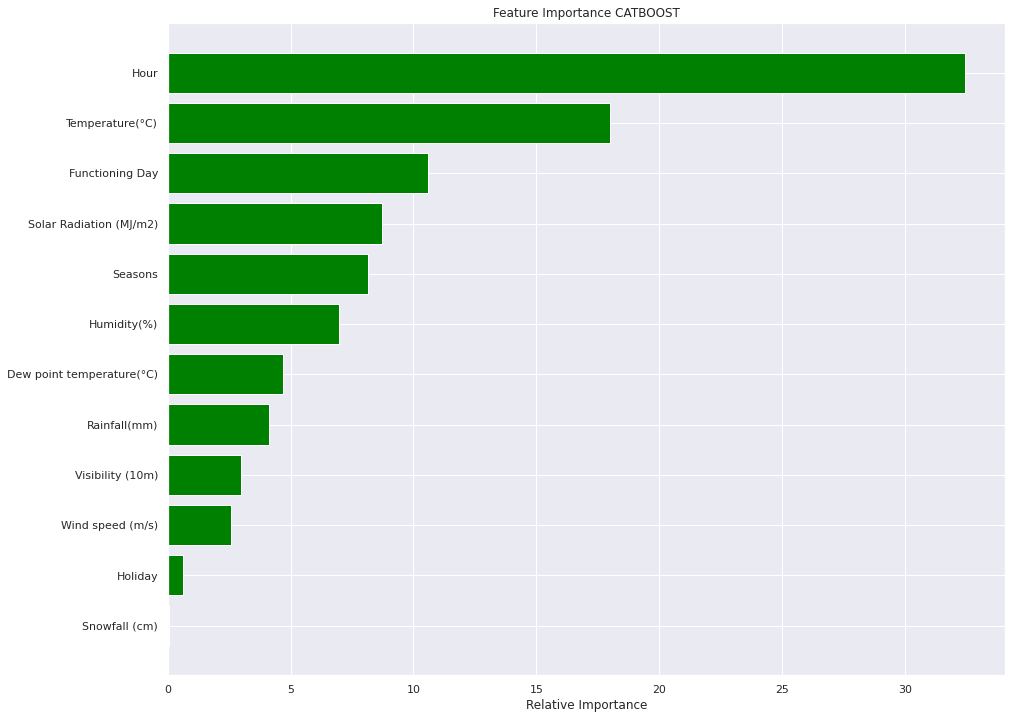

In [ ]:
# Ploting the Feature Importance
plt.barh( importance_df['Feature'],importance_df['Feature Importance'], color='green', align='center')
plt.title('Feature Importance CATBOOST')
plt.xlabel('Relative Importance')
plt.rcParams["figure.figsize"] = (15,12)
plt.show()

## Observation: 
According to the Gradiend Boosting and CatBoost method Temperature and Hour are most important features

# **Model Selection and Validation**

In [ ]:
evaluation_dict={'Model_Name':['Linear Regression','Lasso Regression','Ridge Regression','Decision Tree', 'Random Forest','Gradient Boosting','CatBoost'],
                 'Training_score':[0.5632413510709976,0.5632306516187067,0.5632244987403249,0.8192488068498688,0.8274706456508618,0.9414986534558208,0.9799461105347161], 
                 'MSE':[189167.96304223745,189154.4381852058,189155.18366485005,91767.59225878913,86195.17692496302,51868.06264997581,48276.544558471454],
                 'RMSE':[434.93443533737064,434.9188869033004,434.9197439354186, 302.93166268779026,293.5901512737834,227.74560950757274,219.71924030105205],
                 'R-squared':[0.5459746280617703,0.5460070893102051,0.5460053000713334,0.7797469796835017,0.793121432227402,0.8755105459844036,0.8841306120415406 ], 
                 'Adjusted R-Squared':[0.5420515977742857,0.5420843395058579,0.5420825348069729,0.7778438717890619,0.7913338869989521, 0.8744348882596145,0.8833310532977214]}

In [ ]:
evaluation_df=pd.DataFrame(evaluation_dict)

In [ ]:
# Model validation Scores
evaluation_df


,Model_Name,Training_score,MSE,RMSE,R-squared,Adjusted R-Squared
0,Linear Regression,0.563241,189167.963042,434.934435,0.545975,0.542052
1,Lasso Regression,0.563231,189154.438185,434.918887,0.546007,0.542084
2,Ridge Regression,0.563224,189155.183665,434.919744,0.546005,0.542083
3,Decision Tree,0.819249,91767.592259,302.931663,0.779747,0.777844
4,Random Forest,0.827471,86195.176925,293.590151,0.793121,0.791334
5,Gradient Boosting,0.941499,51868.062650,227.745610,0.875511,0.874435
6,CatBoost,0.979946,48276.544558,219.719240,0.884131,0.883331


## Observation:
 

*   It is clearly evident that the Adjusted R2 score for linear regression is very less.

*   Adjusted R2 score very good for Gradient Boosting and CatBoost.

*   To get better predictions we prefer CatBoost Algorithm over other regression algorithms.


# **What we observe in the above process**

*   It is clear from the heatmap, the variables Hour, Temperature, and Dew point temperature have a high impact on the target variable.
*   The independent variable Temperature and Dew point temperatures are highly correlated.

*  From the graph rented bike counts vs temperature, we can see that people prefer to take bike ride more often when the temperature is near about 25 degrees Celcius.

*   From the graph rented bike counts vs temperature, we can easliy conclude that the people gave more preference to bike riding in summers as compare to other seasons.  

*   In the bar plot of Rented bike season wise, we can see that the highest number of bikes are rented in the summer season.

*   In the winter season, people prefer fewer bikes as compared to other seasons.

* The given problem is solved by the regression model but from the pairplot, we can see that the relationship between the independent variable and the dependent variable is not linear. So it shows that a linear regression fitting might not be the best model for it. A linear model might not be able to efficiently explain the data in terms of variability, prediction accuracy etc.

*   Very few bikes are hired on the holidays.

*   The majority of the bikes are rented on days other than holidays.

*   When humidity levels are less than 20% the rented bike counts are quite high.
*   When humidity levels are greater than 50% the rented bike count decreased rapidly.

* It is clearly visible from the graph, the rented bike count increase with an increase in visibility.

* The demand for bikes on rent increases between April to autumn.

*   Mostly bikes were taken on rent when snowfall is less than 4cm.

*   It is very difficult the drive bikes in snow so the usage of bikes decreases in the high snowfall.


*   The usage of rented bikes is high in between 4 pm to 10 pm. It means people take bikes on rent while returning to their homes from their workplaces to avoid heavy traffic.

*   At 8 am in the morning the usage of rented bikes is higher than normal. It means people take bikes on rent to go to their workplace or dropping their children at school.

*   It is clearly evident that the Adjusted R2 score for linear regression is very less.

*   Adjusted R2 score very good for Gradient Boosting.

*   To get better predictions we prefer Gradient Boosting Algorithm over other regression algorithms.

# **Conclusion**



*   The temperature, hours, and solar radiation features were found to be more relevant for the bike count required at each hour for the stable supply of rental bikes.


*   As we have analyzed the various features, we have seen that people prefer to take bikes on rent when temperature is near about 25 degrees Celcius.


*   Other factors such as rainfall and snowfall also have an impact on the requirement of bikes for rent. Because in heavy rainfall and snowfall bike riding sometime becomes dangerous. 


*   As we have analyzed that the rental bike demands are high in the evening and in the morning. So bikes should be available at that time to fulfill the bike demands.

* The Bike demand increases with an increase in visibility and decreases with an increase with humidity.

* We tried adding possible columns to make the model a bit more complex but for Linear Regression model it is still too general.

* We have to make our model more complex for better discretion or move to tree and ensembling algorithm for better results.


* Random forest gives predictions better than a decision tree model. Predictions made by Gradient Boosting are better than all the models that we have used. The value of the Adjusted R-squared for the Gradient Boosting method is  0.875, which is very good.

* Adjusted R-squared for both Gradient Boosting and CatBoost are almost same. The adjusted R_squared score for CatBoost is 0.883. Because of the additional benefits, I will choose CatBoost over Gradient Boosting.


